# Import Libraries

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Dataset

In [118]:
df = pd.read_csv("Apple Stock.csv")

# Convert Date Column to Real Dates

In [119]:
df['Date'] = pd.to_datetime(df['Date'])

# Compute Daily Returns, Volatility & Identify Big Spikes

In [120]:
df.sort_values('Date', inplace=True)

df['Daily Return'] = df['Adj Close'].pct_change()

df['Volatility'] = df['Daily Return'].rolling(window=30).std() * 100  

df['big_spikes'] = (df['Daily Return'] > 0.02) | (df['Daily Return'] < -0.02)

df['Cumulative Max'] = df['Adj Close'].cummax()

df['Drawdown'] = (df['Adj Close'] - df['Cumulative Max']) / df['Cumulative Max'] * 100



# Total Big Spikes

In [121]:
num_spikes = df['big_spikes'].sum()
print(f"🔥 Apple had {num_spikes} big spike days where the stock moved more than ±2%! 🚀")


🔥 Apple had 194 big spike days where the stock moved more than ±2%! 🚀


# Apple Stock Price Over Time

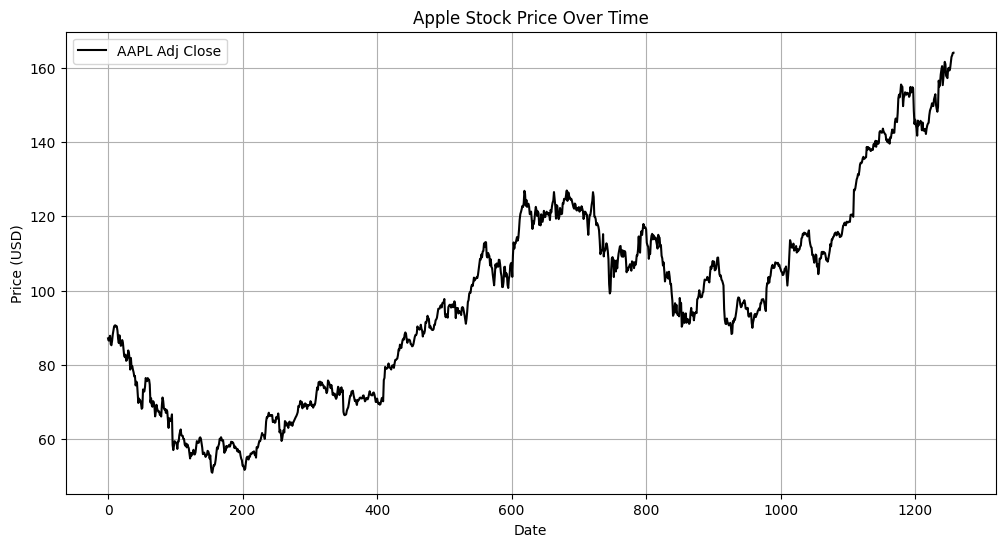

In [122]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'], label='AAPL Adj Close', color='black')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Apple Stock Price with Big Spikes Highlighted

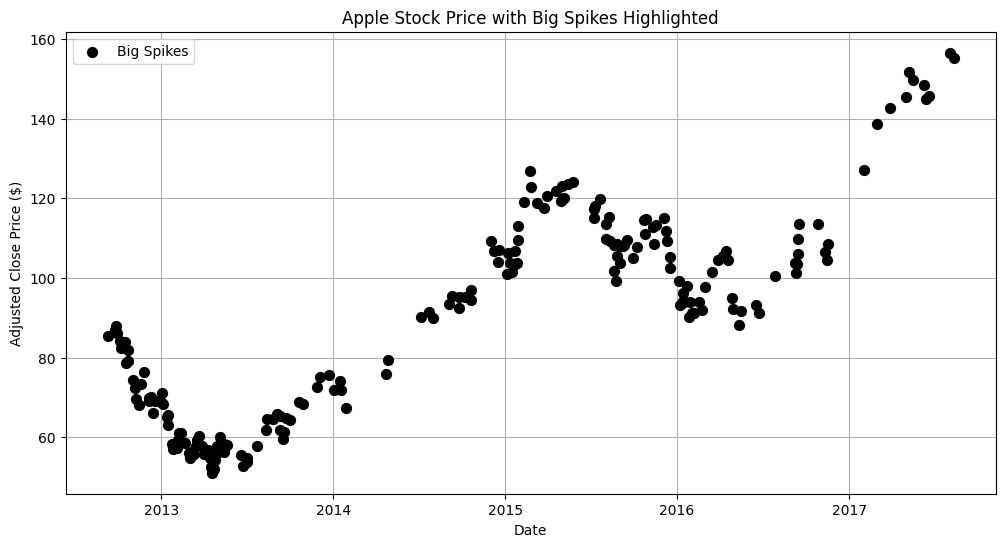

In [123]:
plt.figure(figsize=(12,6))

plt.scatter(df.loc[df['big_spikes'], 'Date'], 
            df.loc[df['big_spikes'], 'Adj Close'], 
            color='black', label='Big Spikes', s=50, zorder=5)

plt.title('Apple Stock Price with Big Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.legend()
plt.grid(True)
plt.show()


# Apple Stock Volatility Over Time

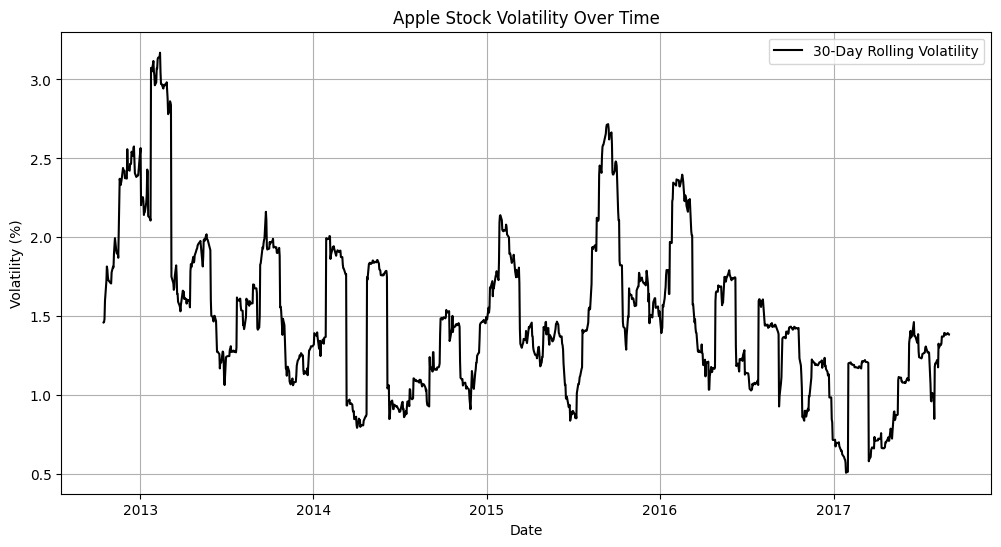

In [124]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volatility'], color='black', label='30-Day Rolling Volatility')
plt.title('Apple Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

# Apple Stock Drawdown Over Time

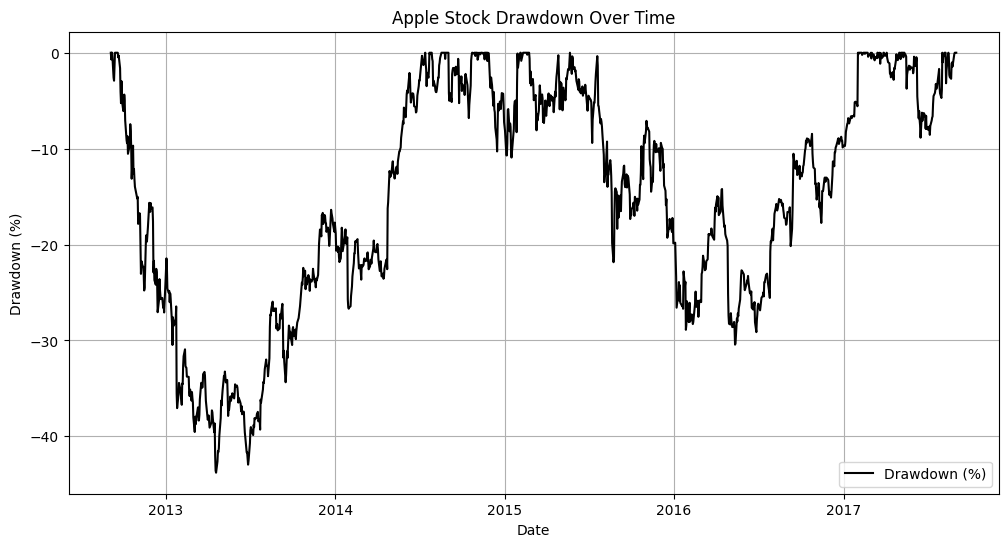

In [125]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Drawdown'], color='black', label='Drawdown (%)')
plt.title('Apple Stock Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.grid(True)
plt.legend()
plt.show()


# Analysis

### The visualizations provide a comprehensive overview of Apple’s stock behavior over time. The stock price plot illustrates the general trend and daily fluctuations in Apple’s market value. The volatility plot quantifies the magnitude of daily price movements, highlighting periods of market turbulence. The big spikes plot identifies days with unusually large returns (greater than ±2%), signaling significant market reactions or events, with 194 such occurrences detected. Finally, the drawdown plot measures peak-to-trough declines, revealing periods of substantial losses and risk exposure. Collectively, these analyses offer insights into price trends, risk, and market responsiveness of Apple stock.